In [1]:
%matplotlib inline
from fastai import *

Get the 'pickled' MNIST dataset from http://deeplearning.net/data/mnist/mnist.pkl.gz

In [2]:
path = Path('data/mnist')

In [4]:
path.ls()

[PosixPath('data/mnist/mnist.pkl.gz')]

In [5]:
with gzip.open(path/'mnist.pkl.gz', 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [10]:
len(x_train[0])

784

In [12]:
x_train.shape

(50000, 784)

In [17]:
type(x_train)

numpy.ndarray

In [18]:
type(y_train)

numpy.ndarray

In [9]:
y_train[0]

5

(50000, 784)

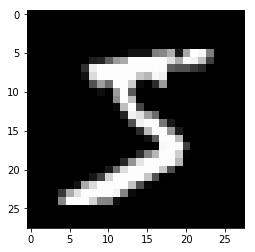

In [11]:
plt.imshow(x_train[0].reshape((28,28)), cmap="gray")
x_train.shape

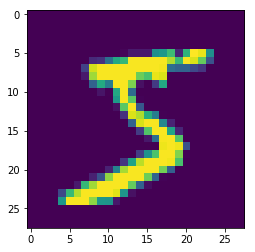

In [16]:
plt.imshow(x_train[0].reshape((28, 28)))

## We have numpy arrays but want tensors so convert

In [22]:
x_train,y_train,x_valid,y_valid = map(torch.tensor, (x_train,y_train,x_valid,y_valid))
num_items,columns = x_train.shape
x_train.shape, y_train.min(), y_train.max()

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


(torch.Size([50000, 784]), tensor(0), tensor(9))

In [23]:
x_train.shape

torch.Size([50000, 784])

In [24]:
num_items

50000

In lesson2-sgd we did these things ourselves:

```python
x = torch.ones(n,2) 
def mse(y_hat, y): return ((y_hat-y)**2).mean()
y_hat = x@a
```

Now instead we'll use PyTorch's functions to do it for us, and also to handle mini-batches (which we didn't do last time, since our dataset was so small).

In [25]:
TensorDataset??

In [37]:
x_train.size(0)

50000

In [36]:
y_train.size(0)

50000

In [38]:
bs=64
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
data = DataBunch.create(train_ds, valid_ds, bs=bs)

In [40]:
len(train_ds)

50000

In [49]:
train_ds[308]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

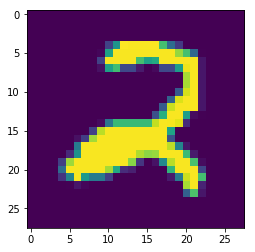

In [51]:
plt.imshow(train_ds[308][0].reshape((28, 28)))

In [52]:
DataBunch.create??

### DataBunch sets up our batch sizes (note validation batch size is 1.5 times bs)

In [55]:
data = DataBunch.create(train_ds, valid_ds, bs=bs)

In [56]:
x,y = next(iter(data.train_dl))
x.shape,y.shape

(torch.Size([64, 784]), torch.Size([64]))

In [174]:
nn.Linear??

In [61]:
my_lin = nn.Linear(2, 3)

In [65]:
my_lin

Linear(in_features=2, out_features=3, bias=True)

In [66]:
class Mnist_Logistic(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10, bias=True)

    def forward(self, xb): return self.lin(xb)

In [67]:
model = Mnist_Logistic().cuda()

In [68]:
model

Mnist_Logistic(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)

In [69]:
model.lin

Linear(in_features=784, out_features=10, bias=True)

In [70]:
model(x).shape

torch.Size([64, 10])

In [78]:
[p.shape for p in model.parameters()]

[torch.Size([10, 784]), torch.Size([10])]

In [77]:
next(model.parameters())

Parameter containing:
tensor([[-0.0296, -0.0178, -0.0223,  ...,  0.0266, -0.0158, -0.0267],
        [ 0.0279,  0.0117,  0.0299,  ..., -0.0286,  0.0166, -0.0117],
        [ 0.0214, -0.0279,  0.0048,  ..., -0.0333,  0.0245, -0.0063],
        ...,
        [-0.0333,  0.0299, -0.0295,  ..., -0.0040,  0.0339,  0.0151],
        [ 0.0095, -0.0318, -0.0131,  ..., -0.0271, -0.0025, -0.0227],
        [-0.0311,  0.0144,  0.0250,  ...,  0.0152,  0.0053, -0.0219]],
       device='cuda:0', requires_grad=True)

In [79]:
lr=2e-2

In [80]:
loss_func = nn.CrossEntropyLoss()

### pytorch does softmax for us in cross entropy loss before taking cross entropy loss so don't need explicit softmax layer in model.

In [81]:
def update(x,y,lr):
    wd = 1e-5
    y_hat = model(x)
    # weight decay
    w2 = 0.
    for p in model.parameters(): w2 += (p**2).sum()
    # add to regular loss
    loss = loss_func(y_hat, y) + w2*wd
    loss.backward()
    with torch.no_grad():
        for p in model.parameters():
            p.sub_(lr * p.grad)
            p.grad.zero_()
    return loss.item()

In [82]:
losses = [update(x,y,lr) for x,y in data.train_dl]

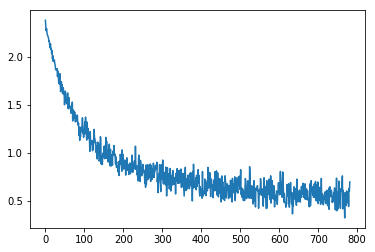

In [83]:
plt.plot(losses);

In [84]:
class Mnist_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin1 = nn.Linear(784, 50, bias=True)
        self.lin2 = nn.Linear(50, 10, bias=True)

    def forward(self, xb):
        x = self.lin1(xb)
        x = F.relu(x)
        return self.lin2(x)

In [85]:
model = Mnist_NN().cuda()

In [86]:
losses = [update(x,y,lr) for x,y in data.train_dl]

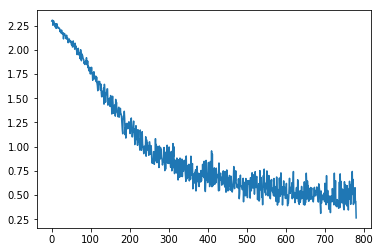

In [87]:
plt.plot(losses);

In [88]:
model = Mnist_NN().cuda()

In [89]:
def update(x,y,lr):
    opt = optim.Adam(model.parameters(), lr)
    y_hat = model(x)
    loss = loss_func(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()

In [90]:
losses = [update(x,y,0.001) for x,y in data.train_dl]

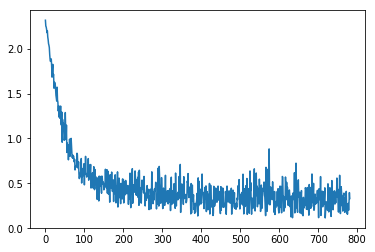

In [91]:
plt.plot(losses);

## Try to rewrite update function with momentum from scratch

In [94]:
optim.Adam??

In [101]:
optim.Optimizer??

In [119]:
class SimpleAdam(optim.Optimizer):
    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, amsgrad=False):
        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay, amsgrad=amsgrad)
        super().__init__(params, defaults)
      
    def __setstate__(self, state):
        super(self).__setstate__(state)
    
    def step(self):
        loss=None
        
        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                amsgrad = group['amsgrad']
                
                state = self.state[p]
                
                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p.data)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(p.data)
                    if amsgrad:
                        # Maintains max of all exp. moving avg. of sq. grad. values
                        state['max_exp_avg_sq'] = torch.zeros_like(p.data)
        
                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                if amsgrad:
                    max_exp_avg_sq = state['max_exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1
                
#                 print("state step!!", state['step'])
                
                if group['weight_decay'] != 0:
                    grad.add_(group['weight_decay'], p.data)
                
                # Decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(1 - beta1, grad)
                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                if amsgrad:
                    # Maintains the maximum of all 2nd moment running avg. till now
                    torch.max(max_exp_avg_sq, exp_avg_sq, out=max_exp_avg_sq)
                    # Use the max. for normalizing running avg. of gradient
                    denom = max_exp_avg_sq.sqrt().add_(group['eps'])
                else:
                    denom = exp_avg_sq.sqrt().add_(group['eps'])

                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']
                step_size = group['lr'] * math.sqrt(bias_correction2) / bias_correction1

                p.data.addcdiv_(-step_size, exp_avg, denom)
                
#                 print("loss!!", loss)
                
        return loss

In [157]:
model = Mnist_NN().cuda()

In [158]:
def update(x,y,lr):
    opt = SimpleAdam(model.parameters(), lr)
    y_hat = model(x)
    loss = loss_func(y_hat, y)
    loss.backward()
    opt.step()
    opt.zero_grad()
    return loss.item()

In [159]:
losses = [update(x,y,0.001) for x,y in data.train_dl]

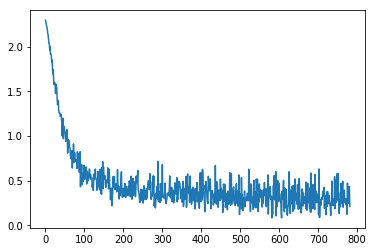

In [139]:
plt.plot(losses);

In [160]:
x,y = next(iter(data.train_dl))

In [162]:
model = Mnist_NN().cuda()
y_hat = model(x)
y_hat

tensor([[ 0.0256, -0.1008,  0.0445, -0.0776, -0.1521, -0.0756, -0.0123,  0.0631,
          0.0044,  0.1561],
        [-0.0728, -0.0663,  0.2325, -0.1395, -0.1510,  0.0188,  0.0408,  0.0039,
          0.0866,  0.0249],
        [ 0.0817, -0.1321,  0.2243, -0.1235, -0.1921,  0.0048, -0.0480,  0.0669,
         -0.0164,  0.0317],
        [-0.0015, -0.1708,  0.1299, -0.1236, -0.0977, -0.0763,  0.0432,  0.1790,
         -0.0922,  0.1688],
        [ 0.0156, -0.1433,  0.1672, -0.0740, -0.1945,  0.0655, -0.0965,  0.0986,
         -0.0381, -0.0017],
        [-0.0108, -0.1549,  0.2202, -0.1183, -0.1154,  0.0456,  0.0815,  0.0946,
         -0.0584,  0.0925],
        [ 0.0511, -0.0850,  0.1090, -0.0665, -0.1501,  0.0146, -0.0319,  0.0483,
         -0.0631,  0.0495],
        [-0.0178, -0.1075,  0.1713, -0.1169, -0.2003, -0.0267,  0.0863,  0.0310,
          0.1307, -0.0225],
        [-0.0561, -0.0337,  0.1645, -0.0970, -0.1451,  0.0339, -0.0105, -0.0142,
          0.0224,  0.0909],
        [-0.0089, -

In [163]:
loss = loss_func(y_hat, y)

In [164]:
loss

tensor(2.3030, device='cuda:0', grad_fn=<NllLossBackward>)

In [165]:
loss.backward()

In [166]:
loss

tensor(2.3030, device='cuda:0', grad_fn=<NllLossBackward>)

In [167]:
loss.item()

2.3029818534851074

In [92]:
Learner??

Learner is wrapper so don't have to create update function, etc. and can call lr finder.

In [168]:
learn = Learner(data, Mnist_NN(), loss_func=loss_func)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


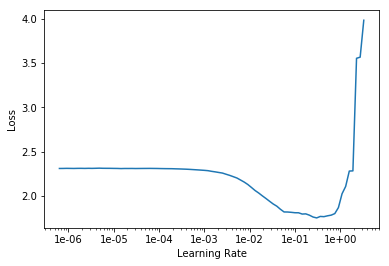

In [169]:
learn.lr_find()
learn.recorder.plot()

In [170]:
learn.fit_one_cycle(1, 1e-2)

Total time: 00:03
epoch  train_loss  valid_loss
1      0.168454    0.141078    (00:03)



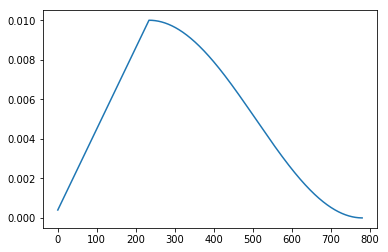

In [171]:
learn.recorder.plot_lr()

#### Momentum is inverse of learning rate -- when learning rate is big don't want to just get bigger. When learning rates are low, want more momentum.

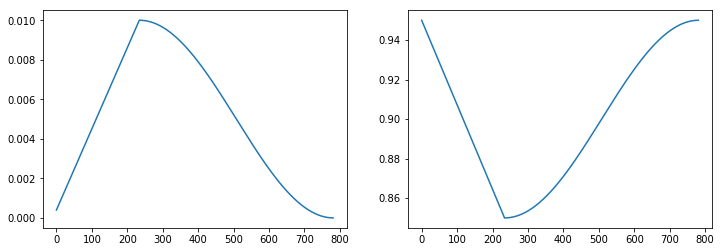

In [172]:
learn.recorder.plot_lr(show_moms=True)

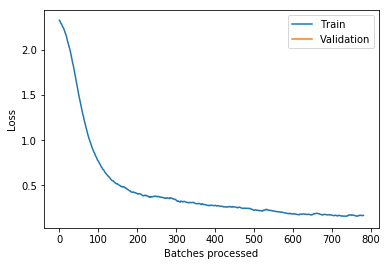

In [173]:
learn.recorder.plot_losses()

## fin